## Define regimes for N' and N'' (increasing with depth)

$N(z)=N_0 + N'(z-z_0) + N''(z-z_0)^2$, where $N_0$ is the concentration at $z_0$. I will start with $z_0=H_s$, so $N_0$ is a reference concentration at shelf break depth.
 
 Non-dimensional profile:
 
 $\hat{N(z)}=\frac{N(z)}{N_0} = 1 + \hat{N'}(z-Hs) + \hat{N''}(z-H_s)^2$,
 
 where $\hat{}$ variables are divided by $N_0$.
 
 I can't use a non-dim profile for my model so I need o define dimensional regimes where N' and N'' give reasonable concentrations. For the non-dimesional case I found $0.0<\hat{N'}<0.006$ and $0.0001<\hat{N''}<0.00001$.
 
 

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sympy as sym
import seaborn as sns
sym.init_printing() # enable fancy printing

In [7]:
# Set appearance options seaborn
sns.set_style('white')
sns.set_context('notebook')

In [8]:
# Constants and scales from canyon bathy

#L = 6400.0 # canyon length
#R = 5000.0 # Upstream radius of curvature
#g = 9.81 # accel. gravity
#Wsb = 13000 # Width at shelf break
#Hs = 147.5 # Shelf break depth
#Hh = 97.5 # 
#Hr = 130.0 # rim depth at dn station
# NOTE: The default values of all functions correspond to the base case


In [26]:
N1,N2,z,Co,Hs,tau = sym.symbols('N1,N2,z,Co,Hs,tau')
func = Co + N1*(z-Hs) + N2*((z-Hs)**2)


In [27]:
func

A reasonable number for $\hat{N'}$ is 0.006. This comes from the slope of the linear nitrate profile I use $d\hat{N}/dz \approx ((32\mu M-3 \mu M)/(150 m))/32 \mu M$. Using a higher value gives negative concetrations at surface.

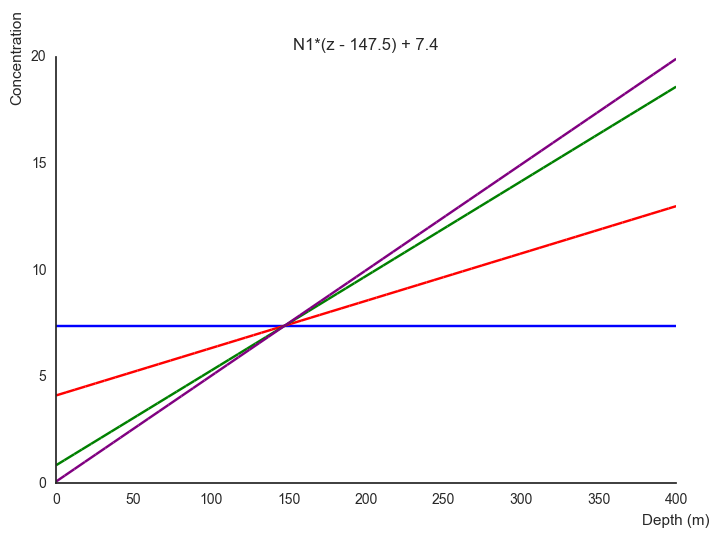

In [28]:
func = 7.4 + N1*(z-Hs) + N2*((z-Hs)**2)
func = func.subs({Hs:147.5,N2:0})
hand =sym.plot(func.subs(N1,0.0*7.4),
               func.subs(N1,0.003*7.4),
               func.subs(N1,0.006*7.4),
               func.subs(N1,0.0067*7.4),(z, 0, 400),
               xlabel='Depth (m)',
               ylabel='Concentration',
               title='%s' %func,
               show=False)
hand[1].line_color='r'
hand[2].line_color='g'
hand[3].line_color='purple'

hand.show()

### What should be the value of $\hat{N''}$ to get stable profiles given an $\hat{N'}$? 

i.e. Profiles without 'bellies' (max, mins or inflection points). This might not be necessary but I want to classify them.

There are bellies wherever 

$d\hat{N}/dz=\hat{N'}+2\hat{N''}(z-Hs)=0$. (1)

I don't want these points (I'll call them $z_{belly}$) to be within my profile ($0\le z \le 400$), so I have the conditions:

$z_{belly} \le 0 $ ,  $z_{belly} \ge 400$ (2),

but solving (1) for $z_{belly}$ gives,

$z_{belly}=\frac{-\hat{N'}}{2\hat{N''}}+Hs$ (3). 

Taking the equalities in conditions (2) and equating to (3) gives:

(4) $\frac{\hat{N'}}{2Hs}\ge {\hat{N''}}$ and (5) $\frac{\hat{N'}}{2(Hs-400)}\le {\hat{N''}}$, 

for a given $ 0\le\hat{N'}\le0.0067$. This last range comes from above.

The region that satisfies conditions (4) and (5) is the triangle plotted below. Also, these hold for the dimensional parameters $N'$ and $N''$, where $  0 \le N'\le No0.00067$





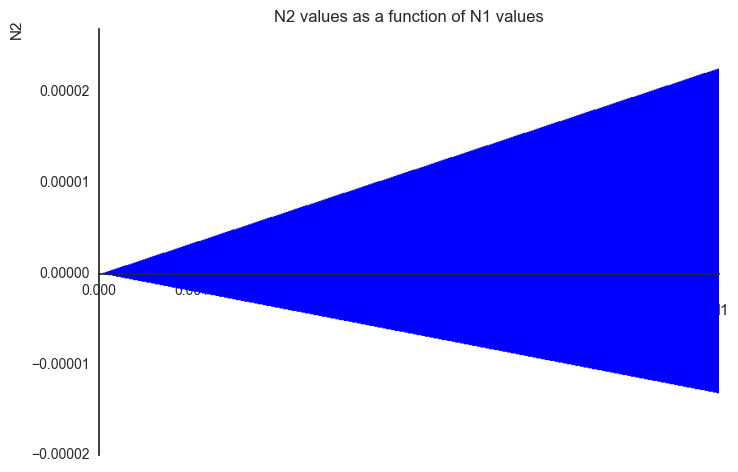

In [12]:
p2 = sym.plot_implicit(sym.And(N1/(2*(-400+147.5)) < N2,N1/(2*147.5) > N2), (N1, 0, 0.0067) ,(N2, -0.00002, 0.000027),
                      title='N2 values as a function of N1 values')


Let's see if it works...

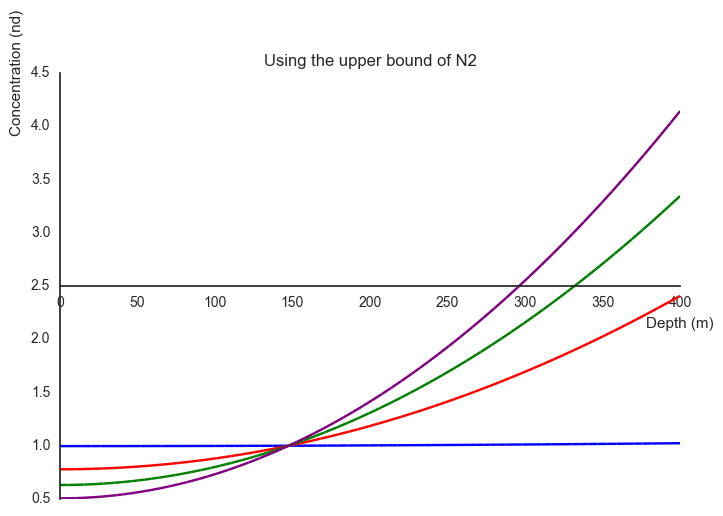

In [13]:
func = 1 + N1*(z-Hs) + N2*((z-Hs)**2)
hand = sym.plot(func.subs({N1:0.00005,Hs:147.5,N2:0.00005/(2*147.5)}),
               func.subs({N1:0.003,Hs:147.5,N2:0.003/(2*147.5)}),
               func.subs({N1:0.005,Hs:147.5,N2:0.005/(2*147.5)}),
               func.subs({N1:0.0067,Hs:147.5,N2:0.0067/(2*147.5)}),(z, 0, 400),
               xlabel='Depth (m)',
               ylabel='Concentration (nd)',
               title='Using the upper bound of N2',
               show=False)
hand[1].line_color='r'
hand[2].line_color='g'
hand[3].line_color='purple'

hand.show()

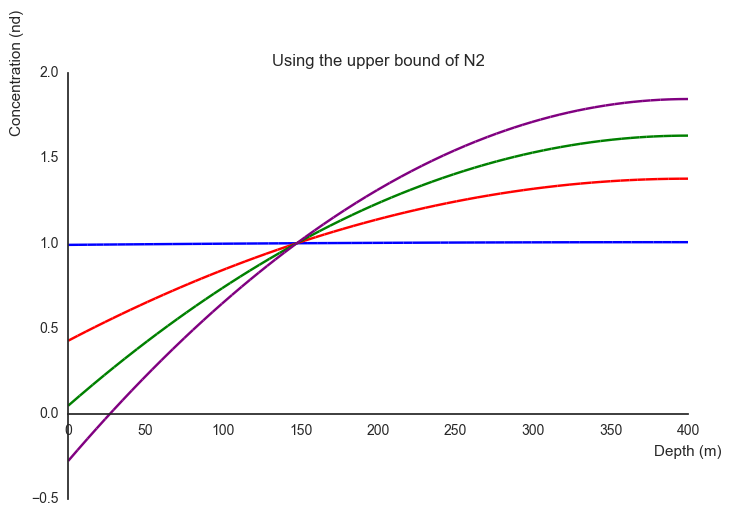

In [14]:
func = 1 + N1*(z-Hs) + N2*((z-Hs)**2)
hand = sym.plot(func.subs({N1:0.00005,Hs:147.5,N2:0.00005/(2*(147.5-400))}),
               func.subs({N1:0.003,Hs:147.5,N2:0.003/(2*(147.5-400))}),
               func.subs({N1:0.005,Hs:147.5,N2:0.005/(2*(147.5-400))}),
               func.subs({N1:0.0067,Hs:147.5,N2:0.0067/(2*(147.5-400))}),(z, 0, 400),
               xlabel='Depth (m)',
               ylabel='Concentration (nd)',
               title='Using the upper bound of N2',
               show=False)
hand[1].line_color='r'
hand[2].line_color='g'
hand[3].line_color='purple'

hand.show()

Oops, N1=0.0067 (purple) becomes negative :(, but none of them have bellies.

## $\tau_v$ as a function of N' and N''

$$\frac{\tau}{Z}=\frac{\delta^2_vN}{\delta_vN}=Z\frac{\delta^2_vN}{\delta_vN}\rvert_{z=Hs}=\frac{2N''}{N'}$$

We have some bounds for N' and N'': we know that $0\le N'\le 0.0067$ if we want to have reasonable, non-negative vertical profiles, and that $N'/2Hs\ge N''$ and $N''\ge N'/(2(Hs-400))$ to have a profile with no max, mins or inflection points above 400 m.

Using these bounds, we can now bound the values of \tau_v/Z:

$$\frac{\tau}{Z}=\frac{N''}{N'} \le \frac{2N'}{2HsN'} = \frac{1}{Hs}$$

and

$$\frac{\tau}{Z}=\frac{N''}{N'} \ge \frac{2N'}{2N'(Hs-400)} = \frac{1}{Hs-400}$$

These bounds do not depend on N' or N'', only on Hs.

So,

$$ \frac{1}{Hs-400} \le \frac{\tau}{Z} \le \frac{1}{Hs}$$

Hs=0 and 400 m are asymptotes, but that is fine. If Hs = 0 it means you don't even have a shelf and if Hs=400 m you probbaly care about not having bellies deeper than that, so 400 m wouldn't even be an asymptote in the first place.

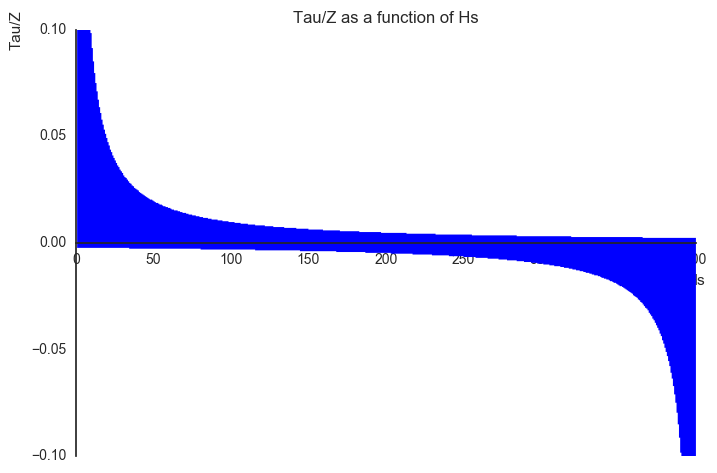

In [15]:
p2 = sym.plot_implicit(sym.And(1/Hs > tau, 1/(Hs-400)< tau), (Hs, 0, 400),(tau,-0.1,0.1),
                      title='Tau/Z as a function of Hs',
                      ylabel='Tau/Z')


In the idealized bathymetry Hs=147.5 m, so the bounds are: $-0.004  \le \frac{\tau}{Z} \le 0.007$, units are m$^{-1}$

### Regime definition

Now we have all the elements to define a range of values for $N'$, $N''$ and $\tau_v$:

(1) Linear profiles that don't go to zero near the surface and increase with depth:

$$0 \le N' \le 0.0067$$ (probably less than 0.006 but not sure yet).


(2) No maximums, minimums or inflection points above 400 m (No bellies) given an $N'$:

$$\frac{\hat{N'}}{2Hs}\ge {\hat{N''}} \,and \,  \frac{\hat{N'}}{2(Hs-400)}\le {\hat{N''}}$$. 

Using these bounds, the regime of values of $\tau/Z$ is:

$$ \frac{1}{Hs-400} \le \frac{\tau}{Z} \le \frac{1}{Hs}$$.

For our value of Hs, 

$$ -0.004 \le \frac{\tau}{Z} \le 0.007$$.





N1=0.0500, N2min=-1.007e-04, Tau/Z=-4.028e-03 
 N1=0.0500, N2max=1.724e-04, Tau/Z=6.895e-03 
 
N1=0.0400, N2min=-1.007e-04, Tau/Z=-5.034e-03 
 N1=0.0400, N2max=1.724e-04, Tau/Z=8.618e-03 
 
N1=0.0300, N2min=-1.007e-04, Tau/Z=-6.713e-03 
 N1=0.0300, N2max=1.724e-04, Tau/Z=1.149e-02 
 


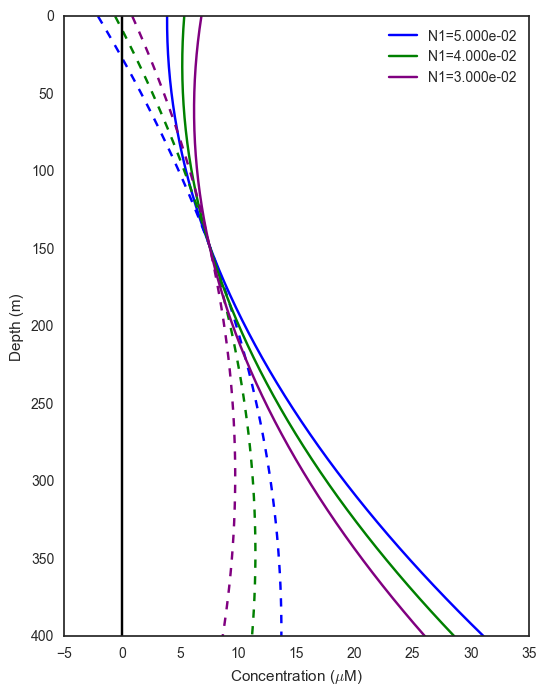

In [44]:
Hs = 147.5
No = 7.5

Nprime = np.array([0.05, 0.04,0.03, 0.001])
z = np.linspace(0,400,50)

labels = ['N1=%1.3e'% Nprime[0],'N1=%1.3e'% Nprime[1],'N1=%1.3e'% Nprime[2]]
colors = ['blue','green','purple','red','orange','pink']
fig,ax = plt.subplots(1,1,figsize=(6,8))

for N1,lab,cc in zip(Nprime,labels,colors):
    N2min = No/(2*Hs*(Hs-400))
    N2max = No/(2*Hs**2)
    
    Nmin = No + N1*(z-Hs) + N2min*(z-Hs)**2
    Nmax = No + N1*(z-Hs) + N2max*(z-Hs)**2
    
    ax.plot(Nmin,z, '--', color=cc)
    ax.plot(Nmax,z,'-', color=cc, label=lab)
    
    Tau_max = 2*N2max/(N1)
    Tau_min = 2*N2min/(N1)
    
    print('N1=%1.4f, N2min=%1.3e, Tau/Z=%1.3e \n N1=%1.4f, N2max=%1.3e, Tau/Z=%1.3e \n '
          %(N1,N2min,Tau_min,N1,N2max,Tau_max))

ax.set_xlabel('Concentration ($\mu$M)')
ax.set_ylabel('Depth (m)')
ax.invert_yaxis()
ax.axvline(0, color='k')
ax.legend(loc=0)

The linear profile I have used for all runs has:

$N'=(2.2\mu M-45.3\mu M)/(0m-1200m)=0.359 \mu M m^{-1}$

so, $\hat{N'}=\frac{N'}{N_0}=\frac{0.3 \mu M m^{-1}}{(7.49 \mu M)}=0.0478$


N1=0.0470, N2mean=-9.307e-05, Tau/Z=5.370e-03 



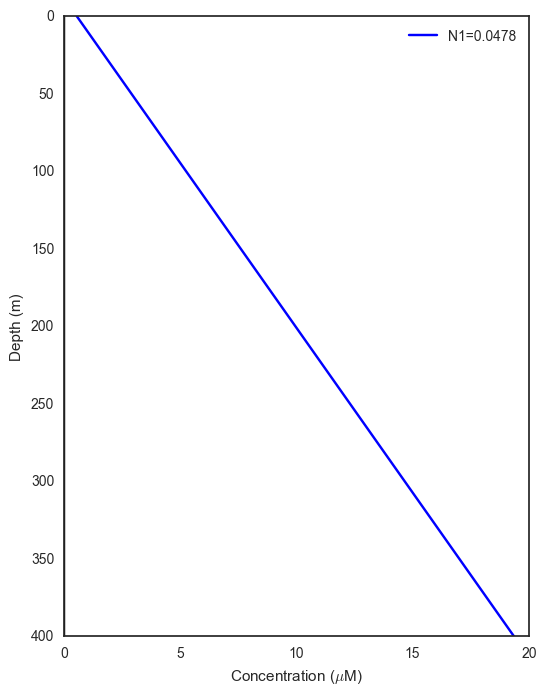

In [46]:
Hs = 147.5
No = 7.49
Nprime = np.array([0.047])
z = np.linspace(0,400,50)

labels = ['N1=0.0478']
colors = ['blue','green','purple','red','orange','pink']
fig,ax = plt.subplots(1,1,figsize=(6,8))

for N1,lab,cc in zip(Nprime,labels,colors):
    N2min = N1/(2*(Hs-400)) 
    N2max = N1/(2*Hs)
    N2mean = (N2max-N2min)/2
    
    Nmean = No + N1*(z-Hs)
    
    ax.plot(Nmean,z,'-', color=cc, label=lab)
    
    Tau_mean = 2*N2mean/(N1)
    
    print('N1=%1.4f, N2mean=%1.3e, Tau/Z=%1.3e \n'
          %(N1,N2min,Tau_mean))

ax.set_xlabel('Concentration ($\mu$M)')
ax.set_ylabel('Depth (m)')
ax.invert_yaxis()
ax.axvline(0, color='k')
ax.legend(loc=0)

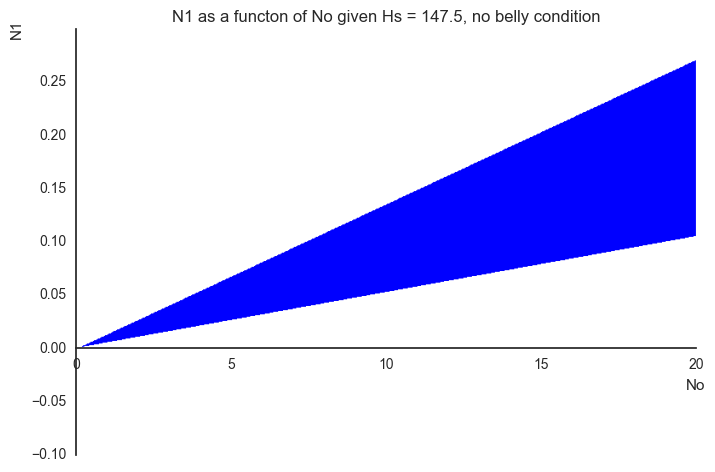

In [71]:
N1,No,Hs = sym.symbols('N1,No,Hs')

p2 = sym.plot_implicit(sym.And((2*No)/147.5 > N1, (No/147.5)*(-1/(-1+(147.5/(2*147.5-800)))) < N1), 
                       (No, 0, 20),(N1,-0.1,0.3),
                      title='N1 as a functon of No given Hs = 147.5, no belly condition')


N1=0.0700, N2mean=-1.007e-04, Tau/Z=3.901e-03 

N1=0.0600, N2mean=-1.007e-04, Tau/Z=4.551e-03 

N1=0.0500, N2mean=-1.007e-04, Tau/Z=5.461e-03 

N1=0.0400, N2mean=-1.007e-04, Tau/Z=6.826e-03 

N1=0.0300, N2mean=-1.007e-04, Tau/Z=9.102e-03 



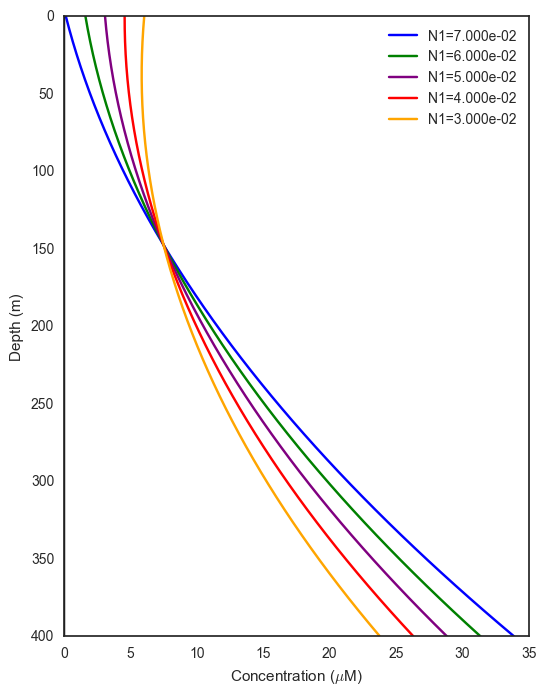

In [73]:
Hs = 147.5
No = 7.5

Nprime = np.array([0.07,0.06,0.05,0.04,0.03])
z = np.linspace(0,400,50)

labels = ['N1=%1.3e'% Nprime[0],'N1=%1.3e'% Nprime[1],'N1=%1.3e'% Nprime[2],'N1=%1.3e'% Nprime[3],'N1=%1.3e'% Nprime[4]]
colors = ['blue','green','purple','red','orange','pink']
fig,ax = plt.subplots(1,1,figsize=(6,8))

for N1,lab,cc in zip(Nprime,labels,colors):
    N2min = No/(2*Hs*(Hs-400)) 
    N2max = No/(2*Hs**2)
    N2mean = (N2max-N2min)/2
    
    Nmean = No + N1*(z-Hs) + N2mean*(z-Hs)**2
    
    ax.plot(Nmean,z,'-', color=cc, label=lab)
    
    Tau_mean = 2*N2mean/(N1)
    
    print('N1=%1.4f, N2mean=%1.3e, Tau/Z=%1.3e \n'
          %(N1,N2min,Tau_mean))

ax.set_xlabel('Concentration ($\mu$M)')
ax.set_ylabel('Depth (m)')
ax.invert_yaxis()
ax.axvline(0, color='k')
ax.legend(loc=0)

N1=0.0800, N2min=-1.007e-04, Tau/Z=-2.517e-03 
 N1=0.0800, N2max=1.724e-04, Tau/Z=4.309e-03 
 
N1=0.0600, N2min=-1.007e-04, Tau/Z=-3.356e-03 
 N1=0.0600, N2max=1.724e-04, Tau/Z=5.745e-03 
 
N1=0.0500, N2min=-1.007e-04, Tau/Z=-4.028e-03 
 N1=0.0500, N2max=1.724e-04, Tau/Z=6.895e-03 
 
N1=0.0400, N2min=-1.007e-04, Tau/Z=-5.034e-03 
 N1=0.0400, N2max=1.724e-04, Tau/Z=8.618e-03 
 
N1=0.0300, N2min=-1.007e-04, Tau/Z=-6.713e-03 
 N1=0.0300, N2max=1.724e-04, Tau/Z=1.149e-02 
 


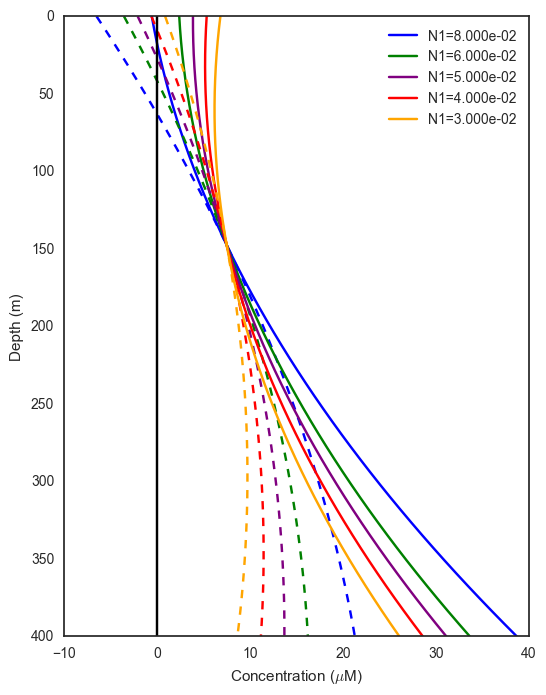

In [78]:
Hs = 147.5
No = 7.5

Nprime = np.array([0.08,0.06,0.05,0.04,0.03])
z = np.linspace(0,400,50)

labels = ['N1=%1.3e'% Nprime[0],'N1=%1.3e'% Nprime[1],'N1=%1.3e'% Nprime[2],'N1=%1.3e'% Nprime[3],'N1=%1.3e'% Nprime[4],]
colors = ['blue','green','purple','red','orange','pink']
fig,ax = plt.subplots(1,1,figsize=(6,8))

for N1,lab,cc in zip(Nprime,labels,colors):
    N2min = No/(2*Hs*(Hs-400))
    N2max = No/(2*Hs**2)
    
    Nmin = No + N1*(z-Hs) + N2min*(z-Hs)**2
    Nmax = No + N1*(z-Hs) + N2max*(z-Hs)**2
    
    ax.plot(Nmin,z, '--', color=cc)
    ax.plot(Nmax,z,'-', color=cc, label=lab)
    
    Tau_max = 2*N2max/(N1)
    Tau_min = 2*N2min/(N1)
    
    print('N1=%1.4f, N2min=%1.3e, Tau/Z=%1.3e \n N1=%1.4f, N2max=%1.3e, Tau/Z=%1.3e \n '
          %(N1,N2min,Tau_min,N1,N2max,Tau_max))

ax.set_xlabel('Concentration ($\mu$M)')
ax.set_ylabel('Depth (m)')
ax.invert_yaxis()
ax.axvline(0, color='k')
ax.legend(loc=0)